In [490]:
'''brief description:
The diabetes dataset comprises clinical measurements from individuals, including pregnancies, glucose levels,
blood pressure, skin thickness, insulin levels, BMI, pedigree-based diabetes risk scores, and age.
Each record indicates whether the individual has been clinically diagnosed with diabetes (1) or not (0),
making it valuable for predictive modeling and healthcare research
'''

'brief description:\nThe diabetes dataset comprises clinical measurements from individuals, including pregnancies, glucose levels,\nblood pressure, skin thickness, insulin levels, BMI, pedigree-based diabetes risk scores, and age.\nEach record indicates whether the individual has been clinically diagnosed with diabetes (1) or not (0),\nmaking it valuable for predictive modeling and healthcare research\n'

In [507]:
# import the labraries that we need
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt 
from collections import Counter

In [508]:
# read the data
data = pd.read_csv(r"C:\Users\alsha\OneDrive\Desktop\PIMA (1).csv")

In [509]:
# columns and rows before removing the missing values
print('data before removing the missing values',data.shape)
data_cleaning = data.dropna()
# columns and rows after removing the missing values
print(f'data after removing the missing values {data_cleaning.shape}')
# removing duplicate records
duplicates = data_cleaning.drop_duplicates()
# print how many duplicate records were removed
num_duplicates = data_cleaning.shape[0] - duplicates.shape[0]
print(f"\nremoved {num_duplicates} duplicate records")

data before removing the missing values (768, 9)
data after removing the missing values (768, 9)

removed 0 duplicate records


In [510]:
# name of columns
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [511]:
# data validating 
def validate(duplicates):
    ''' it will check if the columns are in specific range '''
    if duplicates['BloodPressure'].min() <= 0 or duplicates['BloodPressure'].max() >= 120 or duplicates['Age'].min() <= 0 or \
    duplicates['Age'].max() > 120 or duplicates['Glucose'].min() <= 0 or duplicates['Glucose'].max() >= 250 or \
    duplicates['BMI'].min <= 16 or duplicates['BMI'].max <= 40:
        print('invalid values, recheck')
        return False
    print('data validation is passed')
    return True
# call validate method
val_data = validate(duplicates)
# check if the data needs to reformat or not
if val_data:
    print('the data is readt to analyze')
# reformat the data
else:
    print('the data need to reformat')
    data_cleaned = duplicates[
    (duplicates['BloodPressure'] > 0) &
    (duplicates['BloodPressure'] <= 120) &
    (duplicates['Age'] > 0) &
    (duplicates['Age'] <= 120) &
    (duplicates['Glucose'] > 0) &
    (duplicates['Glucose'] <= 250) &
    (duplicates['BMI'] > 16) &
    (duplicates['BMI'] <= 40)]
    print(f'Removed {len(duplicates) - len(data_cleaned)} invalid rows.')
# save the new processd data to a new excel
data_cleaned.to_csv(r"C:\Users\alsha\OneDrive\Desktop\PIMA (2).csv", index = False)
print('thanks god. the data has been reformatted') 

invalid values, recheck
the data need to reformat
Removed 135 invalid rows.
thanks god. the data has been reformatted


In [512]:
# normalize the data
# read the new data from the excel
new_data = pd.read_csv(r"C:\Users\alsha\OneDrive\Desktop\PIMA (2).csv")
# create a scaler object
scaler = MinMaxScaler()
# apply normalization to the selected features
new_data[['Glucose', 'BMI', 'Age' , 'BloodPressure']] = scaler.fit_transform(new_data[['Glucose', 'BMI', 'Age' , 'BloodPressure']])
# view the transformed data
print(new_data[['Glucose', 'BMI', 'Age', 'BloodPressure']].head())

    Glucose       BMI       Age  BloodPressure
0  0.679739  0.706422  0.483333       0.558140
1  0.267974  0.385321  0.166667       0.488372
2  0.908497  0.233945  0.183333       0.465116
3  0.294118  0.454128  0.000000       0.488372
4  0.470588  0.339450  0.150000       0.581395


In [513]:
#Central values
mean_values=new_data.mean()
median_values=new_data.median()
mode_values=new_data.mode()
print("Mean Values:\n" , mean_values)
print("Median Values:\n" , median_values)
print("Mode Values:\n" , mode_values)

Mean Values:
 Pregnancies                  3.954186
Glucose                      0.497827
BloodPressure                0.551692
SkinThickness               20.213270
Insulin                     79.938389
BMI                          0.574663
DiabetesPedigreeFunction     0.453679
Age                          0.210084
Outcome                      0.317536
dtype: float64
Median Values:
 Pregnancies                  3.000000
Glucose                      0.457516
BloodPressure                0.558140
SkinThickness               22.000000
Insulin                     44.000000
BMI                          0.591743
DiabetesPedigreeFunction     0.362000
Age                          0.133333
Outcome                      0.000000
dtype: float64
Mode Values:
    Pregnancies   Glucose  BloodPressure  SkinThickness  Insulin       BMI  \
0          1.0  0.359477       0.534884            0.0      0.0  0.596330   
1          NaN       NaN            NaN            NaN      NaN  0.614679   
2          

In [514]:
#Correlation between variables
correlation=new_data.corr()
print(correlation.head())

               Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin  \
Pregnancies       1.000000  0.160077       0.243918      -0.054241 -0.041489   
Glucose           0.160077  1.000000       0.214693       0.053156  0.347574   
BloodPressure     0.243918  0.214693       1.000000       0.015568 -0.065649   
SkinThickness    -0.054241  0.053156       0.015568       1.000000  0.415525   
Insulin          -0.041489  0.347574      -0.065649       0.415525  1.000000   

                    BMI  DiabetesPedigreeFunction       Age   Outcome  
Pregnancies    0.107204                 -0.008860  0.557767  0.230393  
Glucose        0.182998                  0.094792  0.297224  0.488130  
BloodPressure  0.235757                 -0.010920  0.373202  0.158478  
SkinThickness  0.388288                  0.149475 -0.108707  0.062572  
Insulin        0.190391                  0.225863 -0.033210  0.165234  


In [515]:
#Grouping and aggregating data
p=new_data.groupby("Pregnancies").agg({
    "Pregnancies":['sum', 'min', 'max', 'count', 'size']
  })
print(p.head())
g=new_data.groupby("Glucose").agg({
    "Glucose":['sum', 'min', 'max', 'count', 'size']
  })
print(g.head())
bp=new_data.groupby("BloodPressure").agg({
    "BloodPressure":['sum', 'min', 'max', 'count', 'size']
  })
print(bp.head())
st=new_data.groupby("SkinThickness").agg({
    "SkinThickness":['sum', 'min', 'max', 'count', 'size']
  })
print(st.head())
s=new_data.groupby("Insulin").agg({
    "Insulin":['sum', 'min', 'max', 'count', 'size']
  })
print(s.head())
b=new_data.groupby("BMI").agg({
    "BMI":['sum', 'min', 'max', 'count', 'size']
  })
print(b.head())
dpf=new_data.groupby("DiabetesPedigreeFunction").agg({
    "DiabetesPedigreeFunction":['sum', 'min', 'max', 'count', 'size']
  })
print(dpf.head())
a=new_data.groupby("Age").agg({
    "Age":['sum', 'min', 'max', 'count', 'size']
  })
print(a.head())
out=new_data.groupby("Outcome").agg({
    "Outcome":['sum', 'count', 'size']
})
print(out.head())

            Pregnancies                   
                    sum min max count size
Pregnancies                               
0                     0   0   0    69   69
1                   112   1   1   112  112
2                   178   2   2    89   89
3                   207   3   3    69   69
4                   240   4   4    60   60
           Glucose                               
               sum       min       max count size
Glucose                                          
0.000000  0.000000  0.000000  0.000000     1    1
0.078431  0.078431  0.078431  0.078431     1    1
0.084967  0.169935  0.084967  0.084967     2    2
0.111111  0.111111  0.111111  0.111111     1    1
0.117647  0.117647  0.117647  0.117647     1    1
              BloodPressure                               
                        sum       min       max count size
BloodPressure                                             
0.000000           0.000000  0.000000  0.000000     1    1
0.162791           0

In [517]:
# word frequency
# convert numbers to words by using replace function
new_data['Outcome'].replace({0: "true", 1: "false"}, inplace=True)
word_frequencies = Counter(new_data['Outcome'])
print("Word Frequencies:")
for word, freq in word_frequencies.items():
    print(f"{word}: {freq}")

Word Frequencies:
false: 201
true: 432


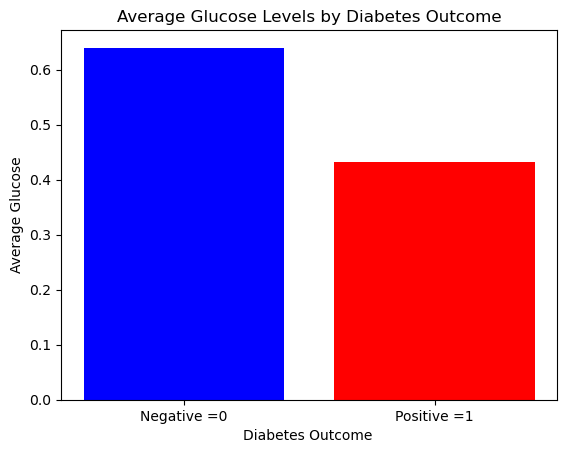

In [518]:
# bar chart
# Calculate the average glucose levels for each diabetes outcome
average_glucose = new_data.groupby('Outcome')['Glucose'].mean()

x = average_glucose.index  
y = average_glucose.values
# Create a bar chart with blue for negative and red for positive outcomes
plt.bar(x, y, color=['blue', 'red'])
plt.xlabel("Diabetes Outcome ")
plt.ylabel("Average Glucose")
plt.title("Average Glucose Levels by Diabetes Outcome")
plt.xticks([0, 1], labels=["Negative =0", "Positive =1"])  
plt.show()

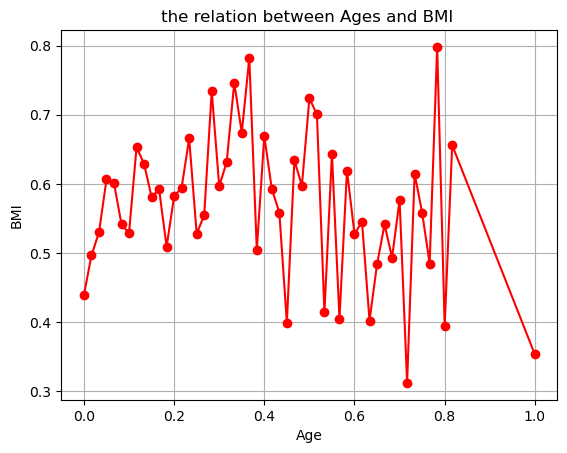

In [519]:
# line graph
# Calculate the average BMI for each age
relation = new_data.groupby('Age')['BMI'].mean()

x = relation.index
y = relation.values 

# Create a line graph with red lines and circular markers
plt.plot(x, y, color='red', marker='o')
plt.xlabel("Age")
plt.ylabel("BMI")
plt.title("the relation between Ages and BMI ")

plt.grid()
plt.show()

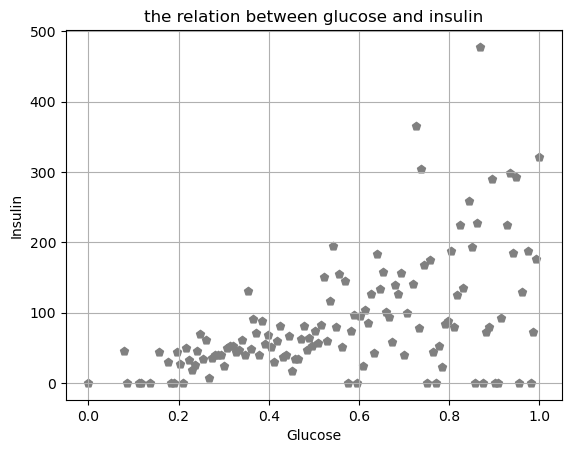

In [520]:
#scatter plot
# Calculate the average insulin level for each glucose level
relation = new_data.groupby('Glucose')['Insulin'].mean()

x = relation.index
y = relation.values

plt.xlabel("Glucose")
plt.ylabel("Insulin")
plt.title("the relation between glucose and insulin")
# Create a scatter plot with gray pentagon-shaped markers
plt.scatter(x, y, marker='p', color='gray')

plt.grid()
plt.show()

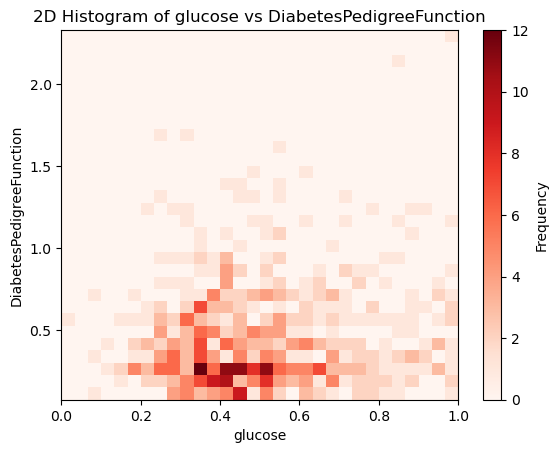

In [521]:
#histogram
# Extract the glucose and Diabetes Pedigree Function data
x = new_data['Glucose']
y = new_data['DiabetesPedigreeFunction']
# Create a 2D histogram with 30 bins and a red color map
plt.hist2d(x, y, bins=30, cmap='Reds')  
cb = plt.colorbar(label='Frequency')  
plt.xlabel("glucose")
plt.ylabel("DiabetesPedigreeFunction")
plt.title("2D Histogram of glucose vs DiabetesPedigreeFunction")

plt.show()

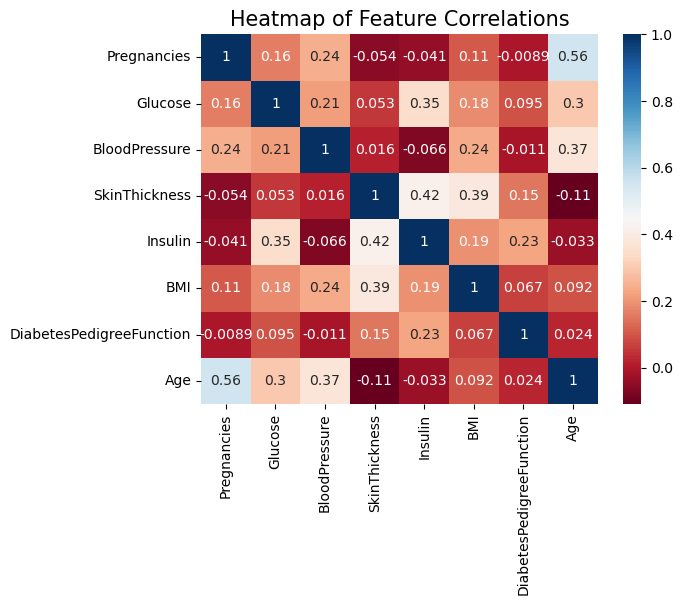

In [522]:
# Heatmap
# Select only numerical columns from the dataset
data = new_data.select_dtypes(include=['number'])
# Compute the correlation matrix for numerical features
correlation = data.corr()
# Create a heatmap to visualize correlations with a red-to-blue color scheme
sns.heatmap(correlation, cmap='RdBu', annot=True)
plt.title("Heatmap of Feature Correlations", fontsize=15)

plt.show()

In [523]:
'''Contribution Report
Aeshah Abdullah and Alshaima Hritani worked in Data Processing 
Arwa Alhaidary worked in Data Analysis
Lujain Alahmadi worked on Data Visualization
'''


'Contribution Report\nAeshah Abdullah and Alshaima Hritani worked in Data Processing \nArwa Alhaidary worked in Data Analysis\nLujain Alahmadi worked on Data Visualization\n'